In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlcup25/ML-CUP25-TS.csv
/kaggle/input/mlcup25/ML-CUP25-TR.csv


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv('/kaggle/input/mlcup25/ML-CUP25-TR.csv',
                 header=None,
                 comment='#')   

data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,-6.925642,-6.093158,-9.149763,-5.918488,4.391259,-1.059304,-5.031085,-6.932177,-5.805652,7.147028,4.555533,-5.694865,6.554997,10.688732,15.416160,-7.535628
1,2,-5.649870,-7.650998,-10.407383,-7.864047,3.790306,-1.673732,-8.493233,-8.143588,-9.447557,10.790796,6.266211,-5.551301,12.342252,-8.135250,23.787661,-3.270978
2,3,15.985886,14.192953,24.466835,12.551305,-7.788409,0.557977,23.145951,20.031774,14.516358,-21.024198,-10.410913,12.061133,28.542661,-14.132383,-56.408372,1.892238
3,4,12.774004,10.156462,18.588934,8.346695,-5.245173,-0.199274,14.500231,12.608063,12.411055,-15.479452,-8.871887,6.703585,20.253500,9.525402,-0.673842,40.295464
4,5,-4.019226,-4.043457,-5.095354,-3.147125,0.725466,-0.477673,-4.025913,-0.995364,-3.491760,3.385533,1.838361,-4.271710,-3.588910,6.050010,1.198489,-11.677909


In [15]:
X = data.iloc[:, 1:13]   
Y = data.iloc[:, 13:17]

print(Y.head())


          13         14         15         16
0   6.554997  10.688732  15.416160  -7.535628
1  12.342252  -8.135250  23.787661  -3.270978
2  28.542661 -14.132383 -56.408372   1.892238
3  20.253500   9.525402  -0.673842  40.295464
4  -3.588910   6.050010   1.198489 -11.677909


In [16]:

Y.isna().sum()

13    0
14    0
15    0
16    0
dtype: int64

In [17]:
X = data.iloc[:, 1:13].to_numpy()
Y = data.iloc[:, 13:17].to_numpy()
print("X shape:", X.shape)
print("Y shape:", Y.shape)


X shape: (500, 12)
Y shape: (500, 4)


In [7]:
print("Train mean (should be ~0):", X_train_scaled.mean(axis=0))
print("Train std (should be ~1):", X_train_scaled.std(axis=0))
print("Validation mean (roughly scaled, not exactly 0):", X_val_scaled.mean(axis=0))
print("Validation std (roughly scaled, not exactly 1):", X_val_scaled.std(axis=0))


NameError: name 'X_train_scaled' is not defined

In [ ]:
print(X_train_scaled.shape, X_val_scaled.shape)
print(Y_train.shape, Y_val.shape)

### Lets define the MLP structure 
### at first the basics are the structure are 12 input layers as there are 12 inputs and 4 output layers as there are 4 outputs. We start with 2 hidden layers for our reference. And lets do 0.001 learning rate

In [8]:
import torch
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, input_dim=12, hidden_dim=128, output_dim=4):
        super(MLP, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),  # Hidden layer 3 (new)
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)  # Linear output for regression
        )

    def forward(self, x):
        return self.model(x)

In [9]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_mees = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"\n--- Fold {fold+1} ---")
    
   
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]

    
    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_val_scaled   = scaler_X.transform(X_val)

   
    X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
    Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)
    X_val_tensor   = torch.tensor(X_val_scaled, dtype=torch.float32)
    Y_val_tensor   = torch.tensor(Y_val, dtype=torch.float32)

    
    model = MLP(input_dim=12, hidden_dim=128, output_dim=4)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    loss_fn = nn.MSELoss()


NameError: name 'KFold' is not defined

In [ ]:
print(X_train_scaled.shape, X_val_scaled.shape)
print(Y_train.shape, Y_val.shape)

In [ ]:
def MEE(y_true, y_pred):
    
    diff = y_true - y_pred
    dist = np.sqrt(np.sum(diff**2, axis=1))  # Euclidean distance per sample
    return np.mean(dist)

In [ ]:
epochs = 1000  
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
        
        
    pred_train = model(X_train_tensor)
        
        
    loss = loss_fn(pred_train, Y_train_tensor)
        
        
    loss.backward()
    optimizer.step()
        
      
    if (epoch+1) % 20 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss.item():.4f}")

   
model.eval()
with torch.no_grad():
    pred_val = model(X_val_tensor).numpy()
    
mee = MEE(Y_val, pred_val)
fold_mees.append(mee)
print(f"Fold {fold+1} MEE: {mee:.4f}")


avg_mee = np.mean(fold_mees)
print(f"\nAverage MEE over 5 folds: {avg_mee:.4f}")

In [ ]:
"""import itertools

# Hyperparameter grid
hidden_units_list = [32, 64, 128]
num_layers_list = [1, 2, 3]
learning_rates = [0.01, 0.001]

best_config = None
best_cv_mee = np.inf

# Loop over all hyperparameter combinations
for hidden_dim, num_layers, lr in itertools.product(hidden_units_list, num_layers_list, learning_rates):
    
    fold_mees = []
    
    for train_index, val_index in kf.split(X):
        # Split
        X_train, X_val = X[train_index], X[val_index]
        Y_train, Y_val = Y[train_index], Y[val_index]

        # Scale
        scaler_X = StandardScaler()
        X_train_scaled = scaler_X.fit_transform(X_train)
        X_val_scaled = scaler_X.transform(X_val)

        # Tensors
        X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
        Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)
        X_val_tensor   = torch.tensor(X_val_scaled, dtype=torch.float32)
        Y_val_tensor   = torch.tensor(Y_val, dtype=torch.float32)

        # Build model dynamically based on num_layers
        layers = [nn.Linear(12, hidden_dim), nn.ReLU()]
        for _ in range(num_layers - 1):
            layers += [nn.Linear(hidden_dim, hidden_dim), nn.ReLU()]
        layers.append(nn.Linear(hidden_dim, 4))  # Output layer
        model = nn.Sequential(*layers)

        # Optimizer and loss
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        loss_fn = nn.MSELoss()

        # Train for a small number of epochs (coarse search)
        epochs = 200
        for epoch in range(epochs):
            model.train()
            optimizer.zero_grad()
            pred_train = model(X_train_tensor)
            loss = loss_fn(pred_train, Y_train_tensor)
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        with torch.no_grad():
            pred_val = model(X_val_tensor).numpy()
        mee = MEE(Y_val, pred_val)
        fold_mees.append(mee)

    # Average over folds
    avg_mee = np.mean(fold_mees)
    print(f"Hidden:{hidden_dim}, Layers:{num_layers}, LR:{lr} --> Avg MEE: {avg_mee:.4f}")

    # Update best config
    if avg_mee < best_cv_mee:
        best_cv_mee = avg_mee
        best_config = (hidden_dim, num_layers, lr)

print(f"\nBest config: Hidden={best_config[0]}, Layers={best_config[1]}, LR={best_config[2]}, CV MEE={best_cv_mee:.4f}")
"""

In [ ]:
"""
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import numpy as np

# --- Define dynamic MLP class ---
class MLP(nn.Module):
    def __init__(self, input_dim=12, hidden_dim=64, output_dim=4, num_layers=2):
        super(MLP, self).__init__()
        layers = [nn.Linear(input_dim, hidden_dim), nn.ReLU()]
        for _ in range(num_layers - 1):
            layers += [nn.Linear(hidden_dim, hidden_dim), nn.ReLU()]
        layers.append(nn.Linear(hidden_dim, output_dim))  # Output layer
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# --- Hyperparameters ---
hidden_units_list = [32, 64, 128]
num_layers_list = [1, 2, 3]
learning_rates = [0.01, 0.001]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_config = None
best_cv_mee = np.inf
top_models = []  # For storing best models for ensembling

# --- Main grid search ---
for hidden_dim, num_layers, lr in itertools.product(hidden_units_list, num_layers_list, learning_rates):
    
    fold_mees = []

    for train_index, val_index in kf.split(X):
        # Split
        X_train, X_val = X[train_index], X[val_index]
        Y_train, Y_val = Y[train_index], Y[val_index]

        # Scale
        scaler_X = StandardScaler()
        X_train_scaled = scaler_X.fit_transform(X_train)
        X_val_scaled = scaler_X.transform(X_val)

        # Tensors
        X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
        Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)
        X_val_tensor   = torch.tensor(X_val_scaled, dtype=torch.float32)
        Y_val_tensor   = torch.tensor(Y_val, dtype=torch.float32)

        # Model
        model = MLP(input_dim=X_train.shape[1], hidden_dim=hidden_dim, 
                    output_dim=Y_train.shape[1], num_layers=num_layers)
        
        optimizer = optim.Adam(model.parameters(), lr=lr)
        loss_fn = nn.MSELoss()

        # Training
        epochs = 200
        for epoch in range(epochs):
            model.train()
            optimizer.zero_grad()
            pred_train = model(X_train_tensor)
            loss = loss_fn(pred_train, Y_train_tensor)
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        with torch.no_grad():
            pred_val = model(X_val_tensor).numpy()
        mee = MEE(Y_val, pred_val)
        fold_mees.append(mee)

    avg_mee = np.mean(fold_mees)
    print(f"Hidden:{hidden_dim}, Layers:{num_layers}, LR:{lr} --> Avg MEE: {avg_mee:.4f}")

    # Save top models for ensembling
    top_models.append((avg_mee, hidden_dim, num_layers, lr, model))
    top_models = sorted(top_models, key=lambda x: x[0])[:5]  # Keep best 5

    # Update best config
    if avg_mee < best_cv_mee:
        best_cv_mee = avg_mee
        best_config = (hidden_dim, num_layers, lr)

print(f"\nBest config: Hidden={best_config[0]}, Layers={best_config[1]}, LR={best_config[2]}, CV MEE={best_cv_mee:.4f}")
"""

In [ ]:

"""import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import numpy as np
import itertools

# --- Define dynamic MLP class with Xavier init ---
class MLP(nn.Module):
    def __init__(self, input_dim=12, hidden_dim=128, output_dim=4, num_layers=3):
        super(MLP, self).__init__()
        layers = [nn.Linear(input_dim, hidden_dim), nn.ReLU()]
        for _ in range(num_layers - 1):
            layers += [nn.Linear(hidden_dim, hidden_dim), nn.ReLU()]
        layers.append(nn.Linear(hidden_dim, output_dim))
        self.model = nn.Sequential(*layers)
        
        # Xavier initialization
        for m in self.model:
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.zeros_(m.bias)

    def forward(self, x):
        return self.model(x)

# --- Hyperparameters (refined grid) ---
hidden_units_list = [112, 128, 144]  # ±16 around best 128
num_layers_list = [2, 3, 4]
learning_rates = [0.008, 0.01, 0.012]
weight_decay = 1e-4  # L2 regularization
epochs = 1000
patience = 50  # Early stopping patience

kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_config = None
best_cv_mee = np.inf
top_models = []

for hidden_dim, num_layers, lr in itertools.product(hidden_units_list, num_layers_list, learning_rates):
    
    fold_mees = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        Y_train, Y_val = Y[train_index], Y[val_index]

        # Scale
        scaler_X = StandardScaler()
        X_train_scaled = scaler_X.fit_transform(X_train)
        X_val_scaled = scaler_X.transform(X_val)

        # Tensors
        X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
        Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)
        X_val_tensor   = torch.tensor(X_val_scaled, dtype=torch.float32)
        Y_val_tensor   = torch.tensor(Y_val, dtype=torch.float32)

        # Model
        model = MLP(input_dim=X_train.shape[1], hidden_dim=hidden_dim, 
                    output_dim=Y_train.shape[1], num_layers=num_layers)
        
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
        loss_fn = nn.MSELoss()  # Still use MSE for training stability

        # Scheduler: Linear decay
        scheduler = optim.lr_scheduler.LinearLR(optimizer, start_factor=1.0, end_factor=0.1, total_iters=epochs)

        # Early stopping
        best_val_mee = np.inf
        patience_counter = 0

        for epoch in range(epochs):
            model.train()
            optimizer.zero_grad()
            pred_train = model(X_train_tensor)
            loss = loss_fn(pred_train, Y_train_tensor)
            loss.backward()
            optimizer.step()
            scheduler.step()

            # --- Validation & MEE monitoring ---
            model.eval()
            with torch.no_grad():
                pred_val = model(X_val_tensor).numpy()
            val_mee = MEE(Y_val, pred_val)

            if val_mee < best_val_mee:
                best_val_mee = val_mee
                best_model_state = model.state_dict()  # Save best fold model
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                break  # Early stopping

        fold_mees.append(best_val_mee)
        top_models.append((best_val_mee, hidden_dim, num_layers, lr, best_model_state))
    
    avg_mee = np.mean(fold_mees)
    print(f"Hidden:{hidden_dim}, Layers:{num_layers}, LR:{lr} --> Avg MEE: {avg_mee:.4f}")

    if avg_mee < best_cv_mee:
        best_cv_mee = avg_mee
        best_config = (hidden_dim, num_layers, lr)

# Keep only top 5 models for ensemble
top_models = sorted(top_models, key=lambda x: x[0])[:5]

print(f"\nBest config: Hidden={best_config[0]}, Layers={best_config[1]}, LR={best_config[2]}, CV MEE={best_cv_mee:.4f}")
"""

In [21]:

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import numpy as np
import itertools


class MLP(nn.Module):
    def __init__(self, input_dim=12, hidden_dim=128, output_dim=4, num_layers=3):
        super(MLP, self).__init__()
        layers = [nn.Linear(input_dim, hidden_dim), nn.ReLU()]
        for _ in range(num_layers - 1):
            layers += [nn.Linear(hidden_dim, hidden_dim), nn.ReLU()]
        layers.append(nn.Linear(hidden_dim, output_dim))
        self.model = nn.Sequential(*layers)

       
        for m in self.model:
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.zeros_(m.bias)

    def forward(self, x):
        return self.model(x)


def MEE_loss(y_true, y_pred):
    return torch.mean(torch.sqrt(torch.sum((y_true - y_pred) ** 2, dim=1)))


hidden_units_list = [128, 144]
num_layers_list = [3, 4]
learning_rates = [0.008, 0.01, 0.012]

weight_decay = 1e-4
epochs = 1000
batch_size = 32
patience = 50

kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_config = None
best_cv_mee = np.inf
results = []  


for hidden_dim, num_layers, lr in itertools.product(
        hidden_units_list, num_layers_list, learning_rates):

    fold_mees = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        Y_train, Y_val = Y[train_index], Y[val_index]

        
        scaler_X = StandardScaler()
        X_train_scaled = scaler_X.fit_transform(X_train)
        X_val_scaled = scaler_X.transform(X_val)

        
        X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
        Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)
        X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
        Y_val_tensor = torch.tensor(Y_val, dtype=torch.float32)

        
        model = MLP(
            input_dim=X_train.shape[1],
            hidden_dim=hidden_dim,
            output_dim=Y_train.shape[1],
            num_layers=num_layers
        )

        optimizer = optim.Adam(
            model.parameters(), lr=lr, weight_decay=weight_decay
        )

        best_val_mee = np.inf
        patience_counter = 0
        n_samples = X_train_tensor.shape[0]

        
        for epoch in range(epochs):
            model.train()
            perm = torch.randperm(n_samples)

            for i in range(0, n_samples, batch_size):
                idx = perm[i:i + batch_size]
                optimizer.zero_grad()
                pred = model(X_train_tensor[idx])
                loss = nn.MSELoss()(pred, Y_train_tensor[idx])
                loss.backward()
                optimizer.step()

            
            model.eval()
            with torch.no_grad():
                pred_val = model(X_val_tensor)
                val_mee = MEE_loss(Y_val_tensor, pred_val).item()

            if val_mee < best_val_mee:
                best_val_mee = val_mee
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                break

        fold_mees.append(best_val_mee)

    avg_mee = np.mean(fold_mees)
    print(
        f"Hidden:{hidden_dim}, Layers:{num_layers}, LR:{lr} "
        f"--> Avg MEE: {avg_mee:.4f}"
    )

    if avg_mee < best_cv_mee:
        best_cv_mee = avg_mee
        best_config = (hidden_dim, num_layers, lr)

print(
    f"\nBest config: Hidden={best_config[0]}, "
    f"Layers={best_config[1]}, "
    f"LR={best_config[2]}, "
    f"CV MEE={best_cv_mee:.4f}"
)
results.append({
    'hidden': hidden_dim,
    'layers': num_layers,
    'lr': lr,
    'avg_cv_mee': avg_mee
})



Hidden:128, Layers:3, LR:0.008 --> Avg MEE: 18.7865
Hidden:128, Layers:3, LR:0.01 --> Avg MEE: 18.3021
Hidden:128, Layers:3, LR:0.012 --> Avg MEE: 18.1932
Hidden:128, Layers:4, LR:0.008 --> Avg MEE: 18.1210
Hidden:128, Layers:4, LR:0.01 --> Avg MEE: 18.2784
Hidden:128, Layers:4, LR:0.012 --> Avg MEE: 18.5132
Hidden:144, Layers:3, LR:0.008 --> Avg MEE: 18.3848
Hidden:144, Layers:3, LR:0.01 --> Avg MEE: 18.2841
Hidden:144, Layers:3, LR:0.012 --> Avg MEE: 18.3548
Hidden:144, Layers:4, LR:0.008 --> Avg MEE: 18.2152
Hidden:144, Layers:4, LR:0.01 --> Avg MEE: 18.3433
Hidden:144, Layers:4, LR:0.012 --> Avg MEE: 18.4041

Best config: Hidden=128, Layers=4, LR=0.008, CV MEE=18.1210


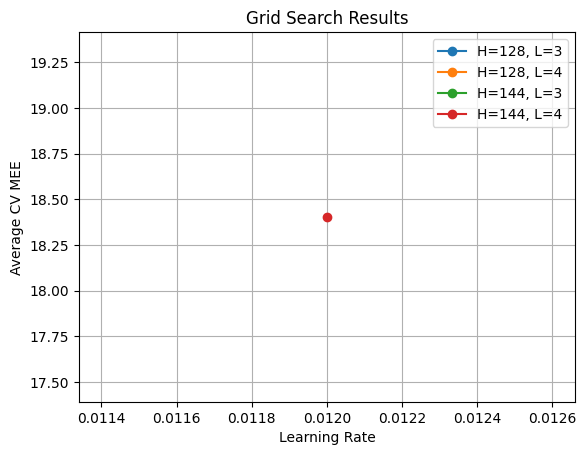

In [22]:
import matplotlib.pyplot as plt


for hidden in hidden_units_list:
    for layers in num_layers_list:
        subset = [r for r in results if r['hidden']==hidden and r['layers']==layers]
        lrs = [r['lr'] for r in subset]
        mees = [r['avg_cv_mee'] for r in subset]
        plt.plot(lrs, mees, marker='o', label=f'H={hidden}, L={layers}')

plt.xlabel('Learning Rate')
plt.ylabel('Average CV MEE')
plt.title('Grid Search Results')
plt.legend()
plt.grid(True)
plt.show()
